In [83]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
budget_data_to_load = "Budget_Data.csv"

# Read School and Student Data File and store into Pandas Data Frames
budget_df = pd.read_csv(budget_data_to_load)
#list(budget_df)


In [84]:
# Acomodando cosas
budget_grouped = budget_df.groupby(['Alcaldia', 'Rubro'])
budget_main=budget_grouped["Monto ejercido"].sum() 
budget_data = pd.DataFrame(budget_main)

budget_df_2 = budget_data.reset_index(level=['Alcaldia', 'Rubro'])
budget_df_2["Monto ejercido"]= budget_df_2["Monto ejercido"]/1000000
budget_df_2 .head()

,Alcaldia,Rubro,Monto ejercido
0,Agencia de Atención Animal De La Ciudad De México,Derechos Humanos,0.190101
1,Agencia de Atención Animal De La Ciudad De México,Otros Asuntos Sociales,10.033560
2,Agencia de Atención Animal De La Ciudad De México,Protección Civil,0.000000
3,Agencia de Gestión Urbana de La Ciudad De México,Alumbrado Público,1134.777153
4,Agencia de Gestión Urbana de La Ciudad De México,Deporte y Recreación,24.820374


In [85]:
# Limpiamos nombres de las alcaldias

alcaldias=budget_df_2["Alcaldia"]

alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias=alcaldias.str.replace(".","")

alcaldias = [alcaldia.upper() for alcaldia in alcaldias]


In [86]:
#Removemos el termino "Alcaldia " que presede al nombre de la alcaldia

budget_df_2["Nombre provisional"] = alcaldias
alcaldias=budget_df_2["Nombre provisional"]
alcaldias=alcaldias.str.replace("ALCALDIA ","")
budget_df_2["Nombre"] = alcaldias
budget_df_2 = budget_df_2[["Nombre", "Rubro", "Monto ejercido"]]


In [87]:
# Tiramos las entidades que no nos interesan

nombres=['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

budget_df_3 = budget_df_2.loc[budget_df_2["Nombre"].isin(nombres),:]

In [88]:
todos_los_rubros = budget_df_3["Rubro"].unique()
todos_los_rubros

array(['Abastecimiento de Agua', 'Alimentación y Nutrición',
       'Alumbrado Público', 'Asuntos Económicos y Comerciales en General',
       'Asuntos Jurídicos', 'Asuntos Laborales Generales', 'Cultura',
       'Deporte y Recreación', 'Derechos Humanos', 'Educación Básica',
       'Familia e Hijos',
       'Ordenación de Aguas Residuales, Drenaje y Alcantarillado',
       'Ordenación de Desechos', 'Otros', 'Otros Asuntos Económicos',
       'Otros Grupos Vulnerables',
       'Otros de Seguridad Social y Asistencia Social', 'Policía',
       'Presidencia / Gubernatura',
       'Prestación de Servicios de Salud a la Comunidad',
       'Protección Civil',
       'Protección de la Diversidad Biológica y del Paisaje',
       'Servicios Comunales', 'Servicios Estadísticos', 'Urbanización',
       'Vivienda', 'Otros de Protección Ambiental', 'Agropecuaria',
       'Turismo', 'Otros Relacionados con Transporte',
       'Generación de Recursos para la Salud',
       'Servicios Registrales, Ad

In [89]:
#Tiramos los rubros que no nos interesan

mis_rubros=["Alumbrado Público", 
        'Policía',
        'Urbanización',
        'Familia e Hijos',
        "apoyo a la prevención del delito",
        'Turismo',   
        'Otros Grupos Vulnerables',
        'Derechos Humanos']

budget_df_4 = budget_df_3.loc[budget_df_3["Rubro"].isin(mis_rubros),:]

In [90]:
budget_final_df = pd.pivot_table(budget_df_4,index=["Nombre"], values=["Monto ejercido"], columns=["Rubro"])

budget_final_df.columns = ["Alumbrado Publico",
        'Derechos Humanos',
        'Familia e Hijos',
        'Grupos Vulnerables',                   
        'Policia',
        'Turismo',                    
        'Urbanizacion']

budget_final_df.reset_index(level=0, inplace=True)
budget_final_df = budget_final_df.fillna(0)

budget_final_df 


,Nombre,Alumbrado Publico,Derechos Humanos,Familia e Hijos,Grupos Vulnerables,Policia,Turismo,Urbanizacion
0,ALVARO OBREGON,321.632837,0.000000,0.000000,3.507526,160.728892,0.000000,448.482360
1,AZCAPOTZALCO,150.956222,0.792550,1.675800,4.525280,118.791416,0.000000,401.930654
2,BENITO JUAREZ,61.837183,0.381930,5.748000,20.317095,113.140868,0.000000,790.965481
3,COYOACAN,212.729122,0.000000,0.000000,23.790221,112.776914,0.000000,501.271139
4,CUAJIMALPA DE MORELOS,115.382944,0.204433,3.731693,29.098179,54.311109,4.704758,313.220019
5,CUAUHTEMOC,244.096641,0.000000,7.309825,86.702473,128.766108,8.551792,592.884630
6,GUSTAVO A MADERO,231.965993,18.641110,3.000000,57.487708,334.322024,0.000000,1382.035352
7,IZTACALCO,149.716195,0.000000,0.000000,6.245034,83.838926,0.000000,431.351909
8,IZTAPALAPA,387.772454,9.156144,3.060000,61.068967,469.798099,0.000000,1011.200865
9,LA MAGDALENA CONTRERAS,88.794282,55.009455,18.642755,73.903500,151.715196,0.000000,493.692838


In [91]:

export_csv = budget_final_df .to_csv ("budget_final.csv") 

#Plots

In [92]:
delitos=[13625, 10007, 19049, 14147, 2690, 31274, 19675, 8799, 28340, 2872, 13736, 1297, 4308, 11379, 11893, 5598]
budget_final_df["delitos"] = delitos

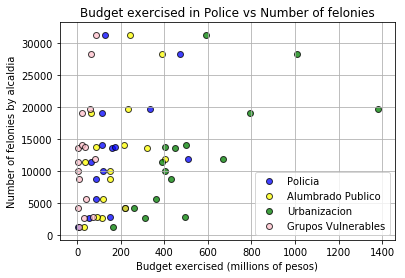

In [102]:
# loop to plot the x and y scatter for each city type
i=0
rubros=['Policia', "Alumbrado Publico", "Urbanizacion", "Grupos Vulnerables"]
colores=["blue", "yellow", "green", "pink"]

for rubro in rubros:
       
    plt.scatter(budget_final_df[rubro], budget_final_df["delitos"], marker="o", facecolors=colores[i], edgecolors="black", alpha=0.75)
    i=i+1

# Incorporate the other graph properties

plt.grid()

plt.title("Budget exercised in Police vs Number of felonies")
plt.xlabel("Budget exercised (millions of pesos)")
plt.ylabel("Number of felonies by alcaldia")

# Create a legend
#plt.legend(handles=[ Urban, Suburban, Rural], loc= "upper rigth")
plt.legend(rubros, loc="best")


# Save Figure
plt.savefig("policia_alumbrado_urbani_vulnera.png")

# Prints the scatter plot to the screen
plt.show()

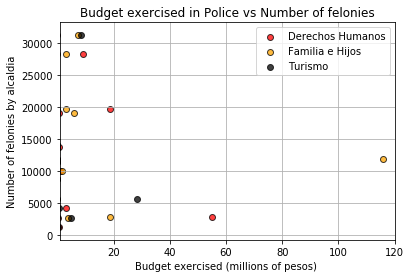

In [104]:
# loop to plot the x and y scatter for each city type
#budget_final_df = budget_final_df.dropna(how='any')
i=0
rubros=['Derechos Humanos', 'Familia e Hijos', "Turismo"]
colores=["red", "orange", "black"]

for rubro in rubros:
   
    plt.scatter(budget_final_df[rubro], budget_final_df["delitos"], marker="o", facecolors=colores[i], edgecolors="black", alpha=0.75)
    i=i+1

# Incorporate the other graph properties

plt.grid()
plt.xlim(0.8, 120)
plt.title("Budget exercised in Police vs Number of felonies")
plt.xlabel("Budget exercised (millions of pesos) ")
plt.ylabel("Number of felonies by alcaldia")

# Create a legend
#plt.legend(handles=[ Urban, Suburban, Rural], loc= "upper rigth")
plt.legend(rubros, loc="best")


# Save Figure
plt.savefig("Dhumanos_familia_turismo.png")

# Prints the scatter plot to the screen
plt.show()

In [106]:
import statsmodels.api as sm

budget_final_df[rubro], budget_final_df["delitos"]
reg1 = sm.OLS(endog=budget_final_df["Policia"], exog=budget_final_df["delitos"], missing='drop')
type(reg1)

results = reg1.fit()
type(results)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Policia   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     26.82
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           0.000112
Time:                        21:10:34   Log-Likelihood:                -101.00
No. Observations:                  16   AIC:                             204.0
Df Residuals:                      15   BIC:                             204.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
delitos        0.0119      0.002      5.178      0.0

C:\Users\tello\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
